# preprocess

In [ ]:
import pandas as pd
path='C:/Users/USER/datasets'

csp=pd.read_csv(path + '/CSP/daily_onion_wholesale.csv')

In [ ]:
csp.head()

In [ ]:
dsum=csp.groupby('date').sum()

In [ ]:
dsum['cost']=(dsum['total']*1000)/dsum['qty']

<AxesSubplot:xlabel='qty', ylabel='cost'>

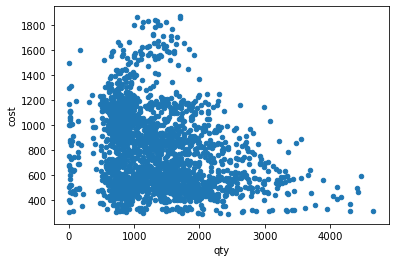

In [ ]:
dsum.plot(x='qty', y='cost', kind='scatter')

In [ ]:
dsum=dsum.reset_index()

In [ ]:
dsum

,date,qty,total,cost
0,14. 1. 10,584.230,375.910,643.428102
1,14. 1. 11,423.370,272.590,643.857619
2,14. 1. 13,619.680,415.940,671.217403
3,14. 1. 14,489.530,342.840,700.345229
4,14. 1. 15,764.850,519.820,679.636530
...,...,...,...,...
2393,21. 9. 4,1459.890,1349.790,924.583359
2394,21. 9. 6,1243.550,1068.460,859.201480
2395,21. 9. 7,881.350,796.940,904.226471
2396,21. 9. 8,1376.932,1208.444,877.635206


In [ ]:
d=dsum.date.str.split('.').str[2]
d=d.str.strip()
d=d.str.zfill(2)
m=dsum.date.str.split('.').str[1]
m=m.str.strip()
m=m.str.zfill(2)
y=dsum.date.str.split('.').str[0]
y='20'+y

In [ ]:
dsum['date']=y+'-'+m+'-'+d

In [ ]:
dsum['date']

0       2014-01-10
1       2014-01-11
2       2014-01-13
3       2014-01-14
4       2014-01-15
           ...    
2393    2021-09-04
2394    2021-09-06
2395    2021-09-07
2396    2021-09-08
2397    2021-09-09
Name: date, Length: 2398, dtype: object

In [ ]:
dsum['date']=pd.to_datetime(dsum['date'])

In [ ]:
dsum=dsum.sort_values(by=['date'],axis=0)

In [ ]:
dsum

,date,qty,total,cost
17,2014-01-03,991.010,725.48,732.061230
19,2014-01-04,533.110,399.97,750.257921
20,2014-01-06,981.930,699.03,711.893923
21,2014-01-07,662.890,481.38,726.183831
22,2014-01-08,649.530,451.31,694.825489
...,...,...,...,...
2193,2021-10-02,1171.170,945.29,807.133038
2194,2021-10-04,1681.530,1400.94,833.134110
2195,2021-10-05,1499.685,1276.92,851.458806
2196,2021-10-06,1555.345,1380.85,887.809457


## save

In [ ]:
dsum.to_csv(path + '/CSP/daily_cost_quantity.csv')

# prophet

In [ ]:
df=dsum[['date','cost']]
df.columns=['ds','y']

NameError: ignored

In [ ]:
train=df[:2000]
test=df[2000:]

In [ ]:
train.tail()

,ds,y
2063,2020-06-15,591.357367
2064,2020-06-16,564.602389
2065,2020-06-17,564.601621
2066,2020-06-18,571.807655
2067,2020-06-19,581.624646


In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=475)
future.tail()

,ds
2470,2021-10-03
2471,2021-10-04
2472,2021-10-05
2473,2021-10-06
2474,2021-10-07


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2470,2021-10-03,1039.659798,335.351776,1666.995879
2471,2021-10-04,1157.592133,473.383362,1794.956236
2472,2021-10-05,1157.074276,467.655417,1791.443508
2473,2021-10-06,1160.092734,457.177660,1820.420332
2474,2021-10-07,1151.917690,448.962061,1823.876659


In [ ]:
forecast

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
ds,,,,,,,,,,,,,,,,,,,
2014-01-03,499.283555,434.853201,739.575756,499.283555,499.283555,81.037973,81.037973,81.037973,10.862662,10.862662,10.862662,70.175311,70.175311,70.175311,0.0,0.0,0.0,580.321528,NaN
2014-01-04,499.043251,433.213892,737.028899,499.043251,499.043251,85.828341,85.828341,85.828341,11.275633,11.275633,11.275633,74.552708,74.552708,74.552708,0.0,0.0,0.0,584.871592,NaN
2014-01-06,498.562643,451.017756,760.480877,498.562643,498.562643,103.536171,103.536171,103.536171,20.249697,20.249697,20.249697,83.286474,83.286474,83.286474,0.0,0.0,0.0,602.098813,NaN
2014-01-07,498.322339,456.180943,762.635119,498.322339,498.322339,106.970659,106.970659,106.970659,19.448578,19.448578,19.448578,87.522081,87.522081,87.522081,0.0,0.0,0.0,605.292998,NaN
2014-01-08,498.082035,467.243465,757.184969,498.082035,498.082035,113.705498,113.705498,113.705498,22.114486,22.114486,22.114486,91.591012,91.591012,91.591012,0.0,0.0,0.0,611.787533,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-03,1168.805726,335.351776,1666.995879,486.508698,1804.491114,-129.145928,-129.145928,-129.145928,-97.452808,-97.452808,-97.452808,-31.693120,-31.693120,-31.693120,0.0,0.0,0.0,1039.659798,NaN
2021-10-04,1169.602230,473.383362,1794.956236,484.846272,1807.615422,-12.010097,-12.010097,-12.010097,20.249697,20.249697,20.249697,-32.259794,-32.259794,-32.259794,0.0,0.0,0.0,1157.592133,833.134110
2021-10-05,1170.398735,467.655417,1791.443508,483.183846,1810.739729,-13.324459,-13.324459,-13.324459,19.448578,19.448578,19.448578,-32.773037,-32.773037,-32.773037,0.0,0.0,0.0,1157.074276,851.458806


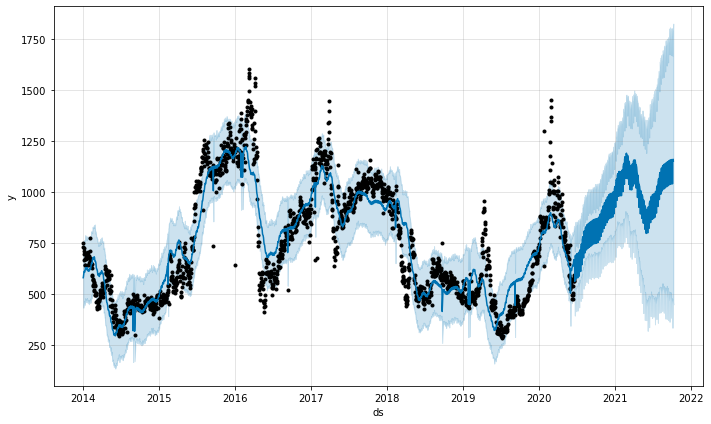

In [ ]:
fig1 = m.plot(forecast)

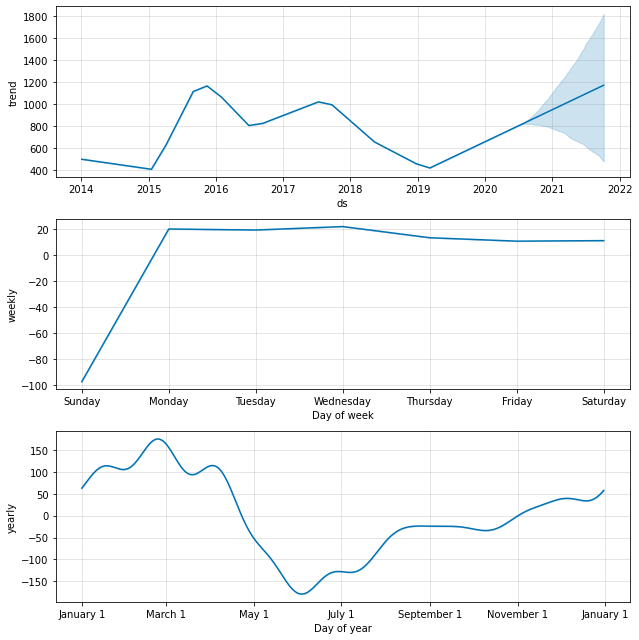

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
test=test.set_index('ds')
forecast=forecast.set_index('ds')
forecast['y']=test['y']

In [ ]:
valdf=forecast.loc['2020-06-20':]
valdf

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
ds,,,,,,,,,,,,,,,,,,,
2020-06-20,794.448692,500.795510,835.361003,794.448692,794.448692,-125.989861,-125.989861,-125.989861,11.275633,11.275633,11.275633,-137.265494,-137.265494,-137.265494,0.0,0.0,0.0,668.458831,601.796018
2020-06-21,795.245197,394.961940,709.287052,795.245197,795.245197,-232.452068,-232.452068,-232.452068,-97.452808,-97.452808,-97.452808,-134.999260,-134.999260,-134.999260,0.0,0.0,0.0,562.793129,1006.528328
2020-06-22,796.041701,531.358728,834.076796,796.041701,796.041701,-112.779161,-112.779161,-112.779161,20.249697,20.249697,20.249697,-133.028858,-133.028858,-133.028858,0.0,0.0,0.0,683.262540,580.976489
2020-06-23,796.838205,517.650830,824.954349,796.838205,796.838205,-111.917680,-111.917680,-111.917680,19.448578,19.448578,19.448578,-131.366258,-131.366258,-131.366258,0.0,0.0,0.0,684.920525,562.872881
2020-06-24,797.634710,523.995490,853.559058,797.634710,797.634710,-107.900357,-107.900357,-107.900357,22.114486,22.114486,22.114486,-130.014843,-130.014843,-130.014843,0.0,0.0,0.0,689.734352,576.652356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-03,1168.805726,335.351776,1666.995879,486.508698,1804.491114,-129.145928,-129.145928,-129.145928,-97.452808,-97.452808,-97.452808,-31.693120,-31.693120,-31.693120,0.0,0.0,0.0,1039.659798,NaN
2021-10-04,1169.602230,473.383362,1794.956236,484.846272,1807.615422,-12.010097,-12.010097,-12.010097,20.249697,20.249697,20.249697,-32.259794,-32.259794,-32.259794,0.0,0.0,0.0,1157.592133,833.134110
2021-10-05,1170.398735,467.655417,1791.443508,483.183846,1810.739729,-13.324459,-13.324459,-13.324459,19.448578,19.448578,19.448578,-32.773037,-32.773037,-32.773037,0.0,0.0,0.0,1157.074276,851.458806


In [ ]:
valdf=valdf.fillna(0)

In [ ]:
valdf[['yhat','y']]

,yhat,y
ds,,
2020-06-20,668.458831,601.796018
2020-06-21,562.793129,1006.528328
2020-06-22,683.262540,580.976489
2020-06-23,684.920525,562.872881
2020-06-24,689.734352,576.652356
...,...,...
2021-10-03,1039.659798,0.000000
2021-10-04,1157.592133,833.134110
2021-10-05,1157.074276,851.458806


In [ ]:
valdf[valdf['y']!=0]

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
ds,,,,,,,,,,,,,,,,,,,
2020-06-20,794.448692,500.795510,835.361003,794.448692,794.448692,-125.989861,-125.989861,-125.989861,11.275633,11.275633,11.275633,-137.265494,-137.265494,-137.265494,0.0,0.0,0.0,668.458831,601.796018
2020-06-21,795.245197,394.961940,709.287052,795.245197,795.245197,-232.452068,-232.452068,-232.452068,-97.452808,-97.452808,-97.452808,-134.999260,-134.999260,-134.999260,0.0,0.0,0.0,562.793129,1006.528328
2020-06-22,796.041701,531.358728,834.076796,796.041701,796.041701,-112.779161,-112.779161,-112.779161,20.249697,20.249697,20.249697,-133.028858,-133.028858,-133.028858,0.0,0.0,0.0,683.262540,580.976489
2020-06-23,796.838205,517.650830,824.954349,796.838205,796.838205,-111.917680,-111.917680,-111.917680,19.448578,19.448578,19.448578,-131.366258,-131.366258,-131.366258,0.0,0.0,0.0,684.920525,562.872881
2020-06-24,797.634710,523.995490,853.559058,797.634710,797.634710,-107.900357,-107.900357,-107.900357,22.114486,22.114486,22.114486,-130.014843,-130.014843,-130.014843,0.0,0.0,0.0,689.734352,576.652356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-02,1168.009222,470.855921,1800.157552,488.171124,1801.366807,-19.812909,-19.812909,-19.812909,11.275633,11.275633,11.275633,-31.088542,-31.088542,-31.088542,0.0,0.0,0.0,1148.196313,807.133038
2021-10-04,1169.602230,473.383362,1794.956236,484.846272,1807.615422,-12.010097,-12.010097,-12.010097,20.249697,20.249697,20.249697,-32.259794,-32.259794,-32.259794,0.0,0.0,0.0,1157.592133,833.134110
2021-10-05,1170.398735,467.655417,1791.443508,483.183846,1810.739729,-13.324459,-13.324459,-13.324459,19.448578,19.448578,19.448578,-32.773037,-32.773037,-32.773037,0.0,0.0,0.0,1157.074276,851.458806


In [ ]:
import numpy as np
error=valdf[valdf['y']!=0]['y']-valdf[valdf['y']!=0]['yhat']
mse=(error*error)/len(error)
rmse=np.sqrt(mse.sum())

In [ ]:
rmse

328.1435136135263

In [ ]:
train['y'].mean()

738.397450858849

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = mean_absolute_error(valdf[valdf['y']!=0]['y'], valdf[valdf['y']!=0]['yhat'])
norm=(abs(valdf[valdf['y']!=0]['y']).sum())/len(valdf[valdf['y']!=0]['y'])
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.28862022725311115


#The End#